In [1]:
import pandas as pd

# Load the CSV file using Pandas
df = pd.read_csv('/content/drive/MyDrive/INTEX2023/CSVs/depth.csv')

# Use describe() method on the DataFrame to get summary statistics
df_desc = df.describe()

# Convert the describe() output to a DataFrame
df_desc = pd.DataFrame(df_desc)

# Print the describe() dataframe
df_desc

,depth
count,852.000000
mean,1.193582
std,0.585653
min,0.000000
25%,0.800000
50%,1.100000
75%,1.520000
max,3.930000


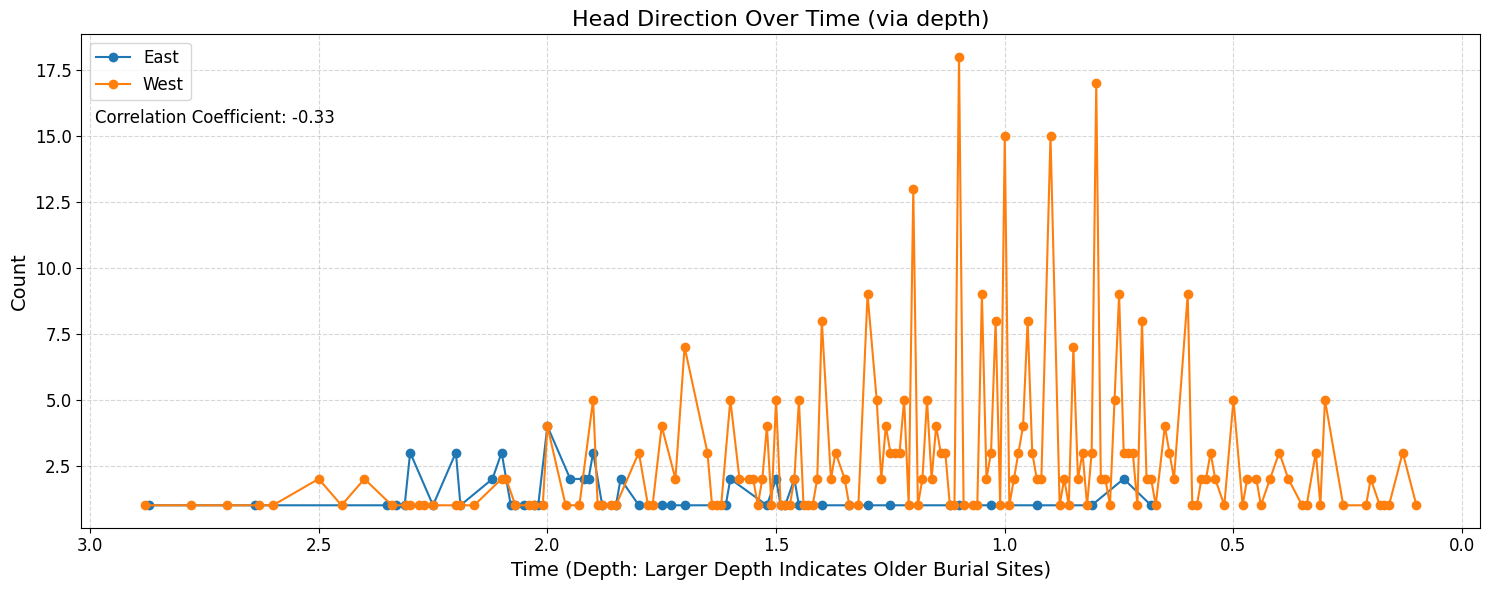

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load depth/head direction into DataFrame
file_path = '/content/drive/MyDrive/INTEX2023/CSVs/depthANDheaddirection.csv' 
depthheaddirection = pd.read_csv(file_path)

# Filter out rows with NULL values in depth or headdirection
depthheaddirection = depthheaddirection.dropna(subset=['depth', 'headdirection'])

# Drop rows with depth value of "U" or headdirection value of "I" or "N LL"
depthheaddirection = depthheaddirection[(depthheaddirection['depth'] != 'U') & (depthheaddirection['headdirection'] != 'I') & (depthheaddirection['headdirection'] != 'N LL')]

# Convert depth column to numeric
depthheaddirection['depth'] = pd.to_numeric(depthheaddirection['depth'], errors='coerce')

# Convert headdirection column to numeric using label encoding
depthheaddirection['headdirection'] = depthheaddirection['headdirection'].astype('category')
depthheaddirection['headdirection'] = depthheaddirection['headdirection'].cat.codes

# Sort by depth in descending order
depthheaddirection = depthheaddirection.sort_values(by='depth', ascending=False)

# Group by headdirection and depth, and calculate count of occurrences
depthheaddirection = depthheaddirection.groupby(['headdirection', 'depth']).size().reset_index(name='count')

# Extract headdirection, depth, and count columns
headdirection = depthheaddirection['headdirection']
depth = depthheaddirection['depth']
count = depthheaddirection['count']

# Create a line graph of count vs. depth for each headdirection category
plt.figure(figsize=(15, 6))  # Increase figure width to 12 inches
for head_dir in headdirection.unique():
    label = 'West' if head_dir == 1 else 'East'  # Custom label for legend
    plt.plot(depth[headdirection == head_dir], count[headdirection == head_dir], marker='o', label=label)

# Calculate correlation coefficient between head direction and depth
correlation_coefficient = np.corrcoef(depthheaddirection['depth'], depthheaddirection['headdirection'])[0, 1]
correlation_coefficient_text = f"Correlation Coefficient: {correlation_coefficient:.2f}"  # Format correlation coefficient as text
plt.annotate(correlation_coefficient_text, xy=(.01, 0.82), xycoords='axes fraction', fontsize=12)  # Add correlation coefficient text annotation

plt.xlabel('Time (Depth: Larger Depth Indicates Older Burial Sites)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Head Direction Over Time (via depth)', fontsize=16)
plt.legend(loc='upper left', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().invert_xaxis()  # Reflect x-axis
plt.tight_layout()
plt.show()

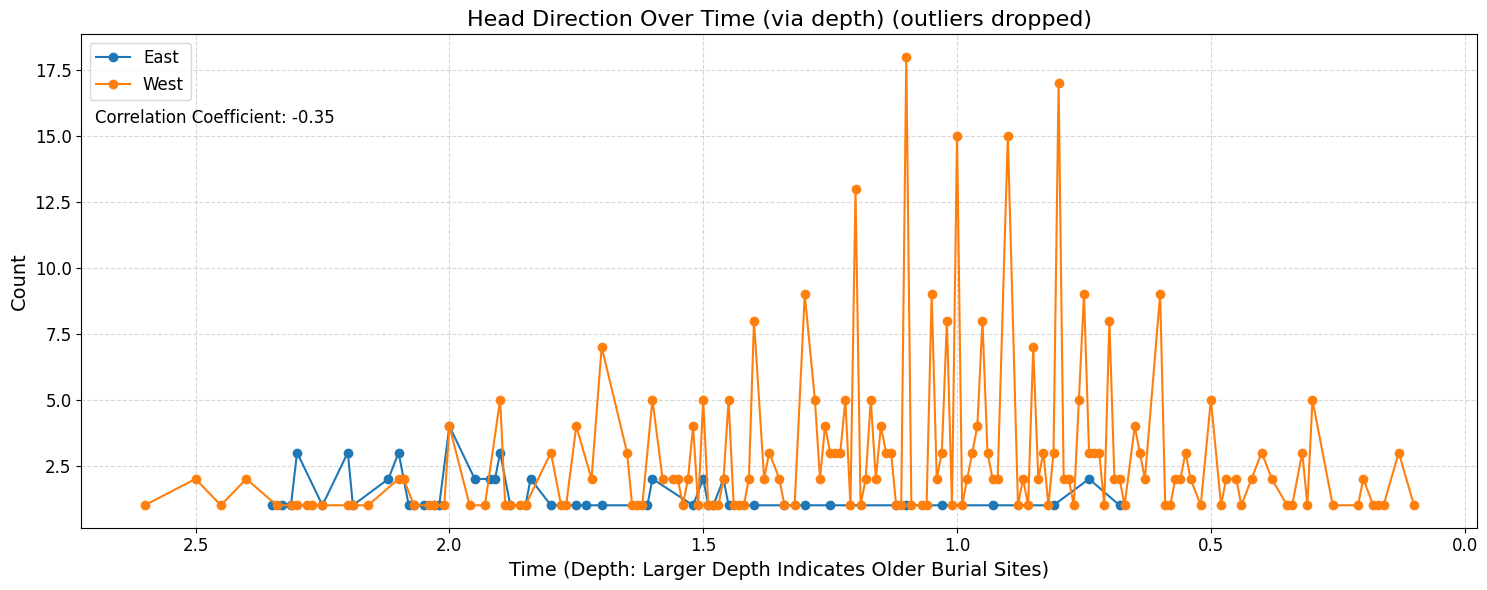

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load depth/head direction into DataFrame
file_path = '/content/drive/MyDrive/INTEX2023/CSVs/depthANDheaddirection.csv' 
depthheaddirection = pd.read_csv(file_path)

# Filter out rows with NULL values in depth or headdirection
depthheaddirection = depthheaddirection.dropna(subset=['depth', 'headdirection'])

# Drop rows with depth value of "U" or headdirection value of "I" or "N LL"
depthheaddirection = depthheaddirection[(depthheaddirection['depth'] != 'U') & (depthheaddirection['headdirection'] != 'I') & (depthheaddirection['headdirection'] != 'N LL')]

# Convert depth column to numeric
depthheaddirection['depth'] = pd.to_numeric(depthheaddirection['depth'], errors='coerce')

# Drop outliers from depth column
Q1 = depthheaddirection['depth'].quantile(0.25)
Q3 = depthheaddirection['depth'].quantile(0.75)
IQR = Q3 - Q1
depthheaddirection = depthheaddirection[~((depthheaddirection['depth'] < (Q1 - 1.5 * IQR)) | (depthheaddirection['depth'] > (Q3 + 1.5 * IQR)))]

# Convert headdirection column to numeric using label encoding
depthheaddirection['headdirection'] = depthheaddirection['headdirection'].astype('category')
depthheaddirection['headdirection'] = depthheaddirection['headdirection'].cat.codes

# Sort by depth in descending order
depthheaddirection = depthheaddirection.sort_values(by='depth', ascending=False)

# Group by headdirection and depth, and calculate count of occurrences
depthheaddirection = depthheaddirection.groupby(['headdirection', 'depth']).size().reset_index(name='count')

# Extract headdirection, depth, and count columns
headdirection = depthheaddirection['headdirection']
depth = depthheaddirection['depth']
count = depthheaddirection['count']

# Create a line graph of count vs. depth for each headdirection category
plt.figure(figsize=(15, 6))  # Increase figure width to 12 inches
for head_dir in headdirection.unique():
    label = 'West' if head_dir == 1 else 'East'  # Custom label for legend
    plt.plot(depth[headdirection == head_dir], count[headdirection == head_dir], marker='o', label=label)

# Calculate correlation coefficient between head direction and depth
correlation_coefficient = np.corrcoef(depthheaddirection['depth'], depthheaddirection['headdirection'])[0, 1]
correlation_coefficient_text = f"Correlation Coefficient: {correlation_coefficient:.2f}"  # Format correlation coefficient as text
plt.annotate(correlation_coefficient_text, xy=(.01, 0.82), xycoords='axes fraction', fontsize=12)  # Add correlation coefficient text annotation

plt.xlabel('Time (Depth: Larger Depth Indicates Older Burial Sites)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Head Direction Over Time (via depth) (outliers dropped)', fontsize=16)
plt.legend(loc='upper left', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().invert_xaxis()  # Reflect x-axis
plt.tight_layout()
plt.show()

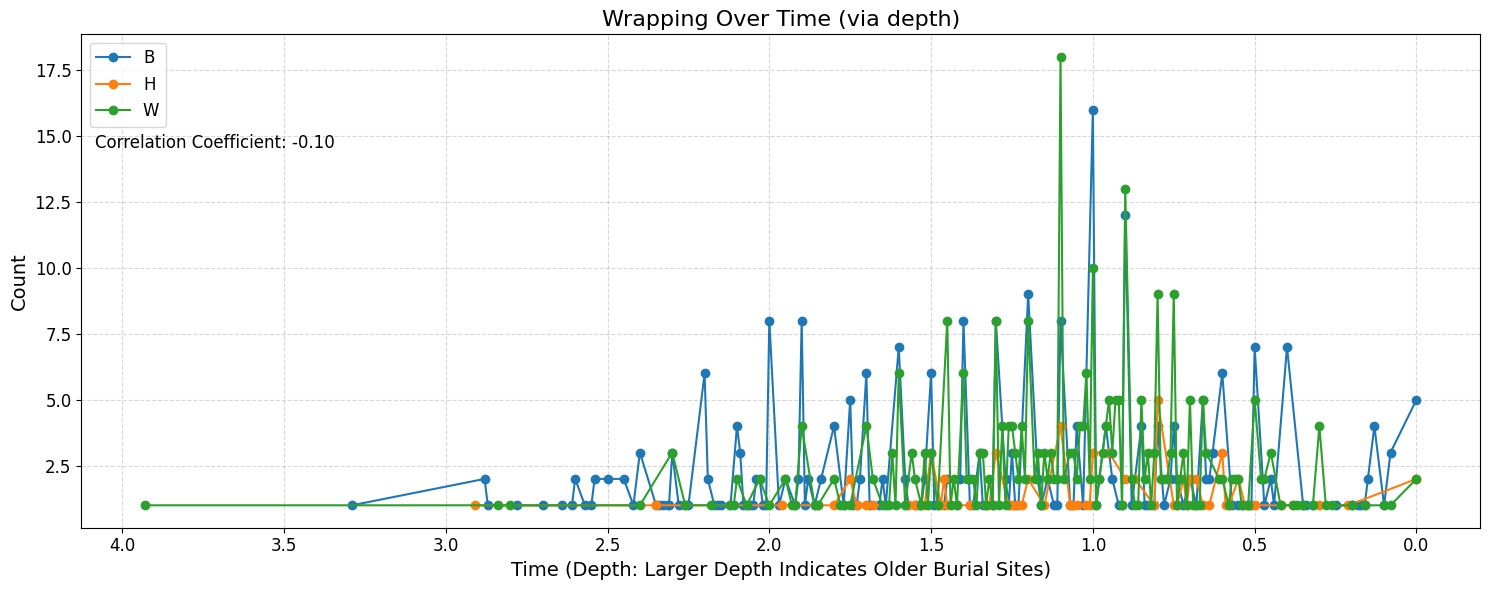

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load depth/wrapping into DataFrame
file_path = '/content/drive/MyDrive/INTEX2023/CSVs/depthANDwrapping.csv'
depthwrapping = pd.read_csv(file_path)

# Filter out rows with NULL values in depth or wrapping
depthwrapping = depthwrapping.dropna(subset=['depth', 'wrapping'])

# Filter out rows with wrapping value of "S"
depthwrapping = depthwrapping[depthwrapping['wrapping'] != 'S']

# Convert depth column to numeric
depthwrapping['depth'] = pd.to_numeric(depthwrapping['depth'], errors='coerce')

# Sort by depth in descending order
depthwrapping = depthwrapping.sort_values(by='depth', ascending=False)

# Group by wrapping and depth, and calculate count of occurrences
depthwrapping = depthwrapping.groupby(['wrapping', 'depth']).size().reset_index(name='count')

# Extract wrapping, depth, and count columns
wrapping = depthwrapping['wrapping']
depth = depthwrapping['depth']
count = depthwrapping['count']

# Create a line graph of count vs. depth for each wrapping category
plt.figure(figsize=(15, 6))  # Increase figure width to 12 inches
for wrap in wrapping.unique():
    plt.plot(depth[wrapping == wrap], count[wrapping == wrap], marker='o', label=wrap)

# Perform correlation analysis
corr, _ = pearsonr(depth, count)
corr_text = f'Correlation Coefficient: {corr:.2f}'
plt.annotate(corr_text, xy=(.01, 0.77), xycoords='axes fraction', fontsize=12)  # Add correlation coefficient text annotation

plt.xlabel('Time (Depth: Larger Depth Indicates Older Burial Sites)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Wrapping Over Time (via depth)', fontsize=16)
plt.legend(loc='upper left', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().invert_xaxis()  # Reflect x-axis

plt.tight_layout()
plt.show()

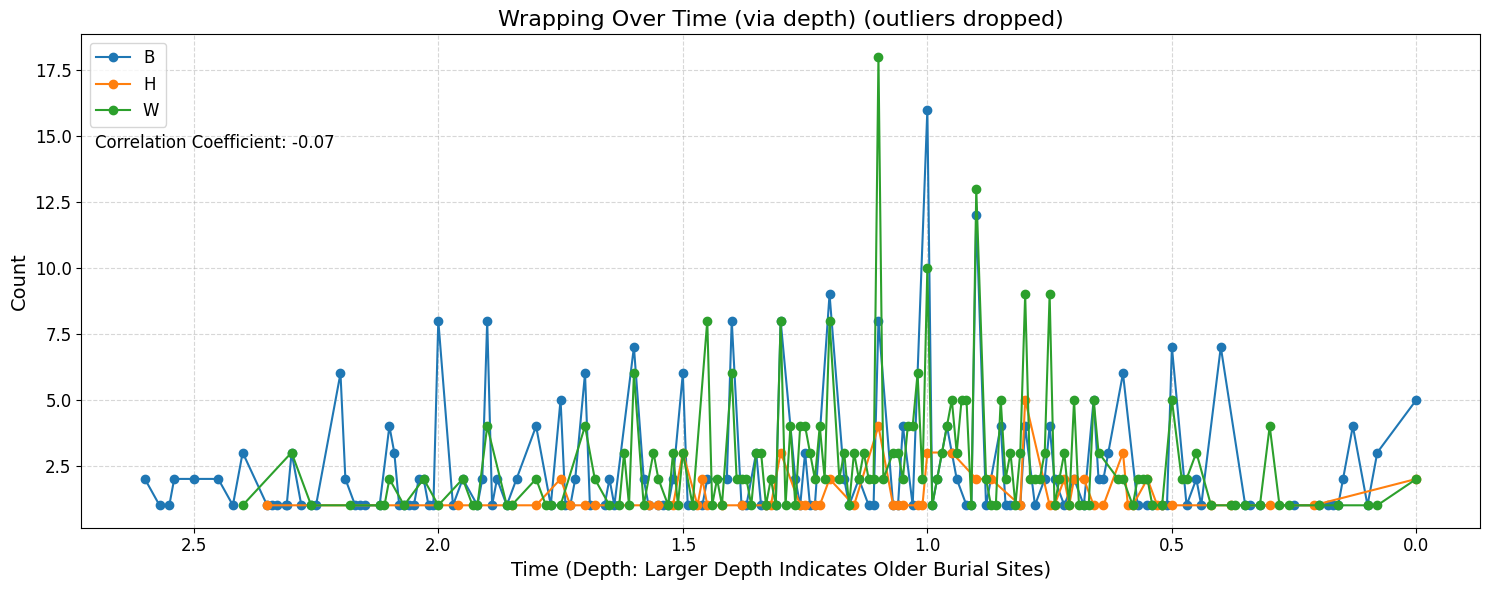

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load depth/wrapping into DataFrame
file_path = '/content/drive/MyDrive/INTEX2023/CSVs/depthANDwrapping.csv'
depthwrapping = pd.read_csv(file_path)

# Filter out rows with NULL values in depth or wrapping
depthwrapping = depthwrapping.dropna(subset=['depth', 'wrapping'])

# Filter out rows with wrapping value of "S"
depthwrapping = depthwrapping[depthwrapping['wrapping'] != 'S']

# Convert depth column to numeric
depthwrapping['depth'] = pd.to_numeric(depthwrapping['depth'], errors='coerce')

# Drop outliers from depth column
Q1 = depthwrapping['depth'].quantile(0.25)
Q3 = depthwrapping['depth'].quantile(0.75)
IQR = Q3 - Q1
depthwrapping = depthwrapping[~((depthwrapping['depth'] < (Q1 - 1.5 * IQR)) | (depthwrapping['depth'] > (Q3 + 1.5 * IQR)))]

# Sort by depth in descending order
depthwrapping = depthwrapping.sort_values(by='depth', ascending=False)

# Group by wrapping and depth, and calculate count of occurrences
depthwrapping = depthwrapping.groupby(['wrapping', 'depth']).size().reset_index(name='count')

# Extract wrapping, depth, and count columns
wrapping = depthwrapping['wrapping']
depth = depthwrapping['depth']
count = depthwrapping['count']

# Create a line graph of count vs. depth for each wrapping category
plt.figure(figsize=(15, 6))  # Increase figure width to 12 inches
for wrap in wrapping.unique():
    plt.plot(depth[wrapping == wrap], count[wrapping == wrap], marker='o', label=wrap)

# Perform correlation analysis
corr, _ = pearsonr(depth, count)
corr_text = f'Correlation Coefficient: {corr:.2f}'
plt.annotate(corr_text, xy=(.01, 0.77), xycoords='axes fraction', fontsize=12)  # Add correlation coefficient text annotation

plt.xlabel('Time (Depth: Larger Depth Indicates Older Burial Sites)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Wrapping Over Time (via depth) (outliers dropped)', fontsize=16)
plt.legend(loc='upper left', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().invert_xaxis()  # Reflect x-axis

plt.tight_layout()
plt.show()

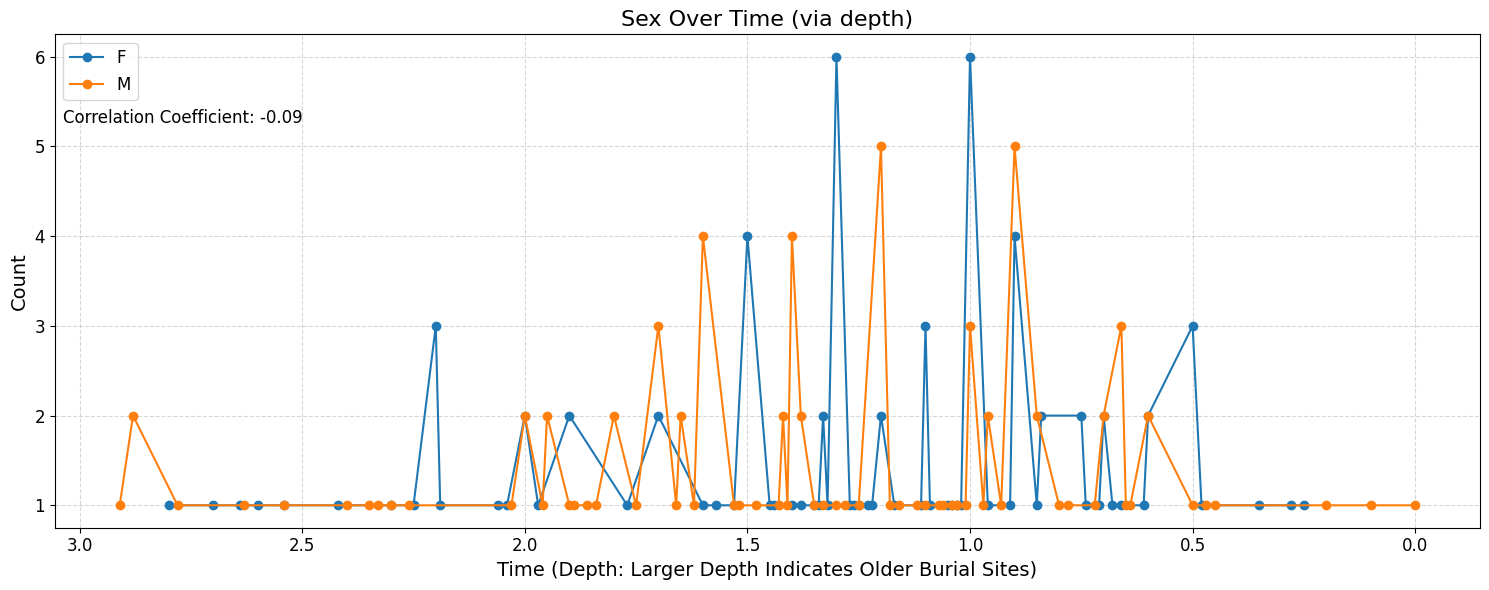

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load depth/sex into DataFrame
file_path = '/content/drive/MyDrive/INTEX2023/CSVs/depthANDsex.csv' 
depthsex = pd.read_csv(file_path)

# Filter out rows with NULL values in depth or sex
depthsex = depthsex.dropna(subset=['depth', 'sex'])

# Convert depth column to numeric
depthsex['depth'] = pd.to_numeric(depthsex['depth'], errors='coerce')

# Sort by depth in descending order
depthsex = depthsex.sort_values(by='depth', ascending=False)

# Group by sex and depth, and calculate count of occurrences
depthsex = depthsex.groupby(['sex', 'depth']).size().reset_index(name='count')

# Extract sex, depth, and count columns
sex = depthsex['sex']
depth = depthsex['depth']
count = depthsex['count']

# # Calculate the average count for male and female
# avg_male = depthsex[sex == 'M']['count'].mean()
# avg_female = depthsex[sex == 'F']['count'].mean()

# Create a line graph of count vs. depth for each sex category
plt.figure(figsize=(15, 6))  # Increase figure width to 12 inches
for s in sex.unique():
    plt.plot(depth[sex == s], count[sex == s], marker='o', label=s)

# # Add average lines for male and female
# plt.axhline(avg_male, color='blue', linestyle='--', label='Average (Male)')
# plt.axhline(avg_female, color='red', linestyle='--', label='Average (Female)')

plt.xlabel('Time (Depth: Larger Depth Indicates Older Burial Sites)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Sex Over Time (via depth)', fontsize=16)
plt.legend(loc='upper left', fontsize=12)

# Calculate and print the Pearson correlation coefficient
corr, _ = pearsonr(depth, count)
corr_text = "Correlation Coefficient: {:.2f}".format(corr)
plt.text(.09, 0.82, corr_text, transform=plt.gca().transAxes, ha='center', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().invert_xaxis()  # Reflect x-axis
plt.tight_layout()
plt.show()

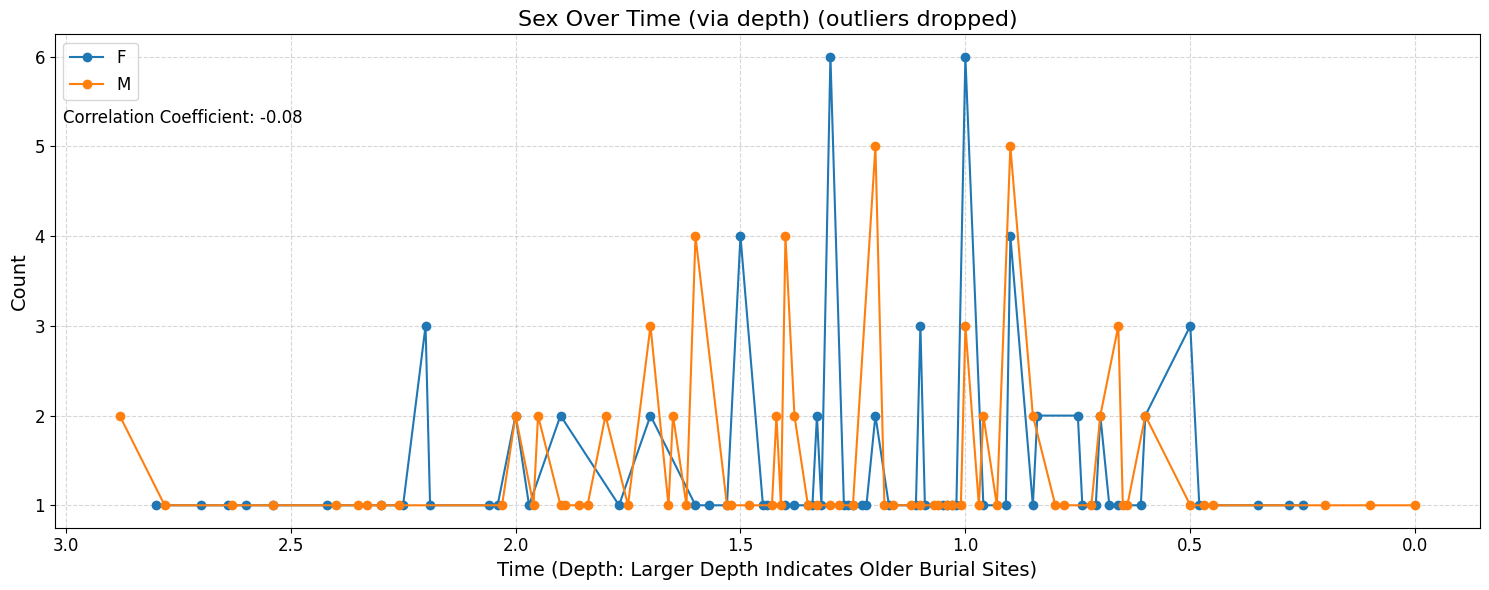

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load depth/sex into DataFrame
file_path = '/content/drive/MyDrive/INTEX2023/CSVs/depthANDsex.csv' 
depthsex = pd.read_csv(file_path)

# Filter out rows with NULL values in depth or sex
depthsex = depthsex.dropna(subset=['depth', 'sex'])

# Convert depth column to numeric
depthsex['depth'] = pd.to_numeric(depthsex['depth'], errors='coerce')

# Drop outliers from depth column
Q1 = depthsex['depth'].quantile(0.25)
Q3 = depthsex['depth'].quantile(0.75)
IQR = Q3 - Q1
depthsex = depthsex[~((depthsex['depth'] < (Q1 - 1.5 * IQR)) | (depthsex['depth'] > (Q3 + 1.5 * IQR)))]

# Sort by depth in descending order
depthsex = depthsex.sort_values(by='depth', ascending=False)

# Group by sex and depth, and calculate count of occurrences
depthsex = depthsex.groupby(['sex', 'depth']).size().reset_index(name='count')

# Extract sex, depth, and count columns
sex = depthsex['sex']
depth = depthsex['depth']
count = depthsex['count']

# # Calculate the average count for male and female
# avg_male = depthsex[sex == 'M']['count'].mean()
# avg_female = depthsex[sex == 'F']['count'].mean()

# Create a line graph of count vs. depth for each sex category
plt.figure(figsize=(15, 6))  # Increase figure width to 12 inches
for s in sex.unique():
    plt.plot(depth[sex == s], count[sex == s], marker='o', label=s)

# # Add average lines for male and female
# plt.axhline(avg_male, color='blue', linestyle='--', label='Average (Male)')
# plt.axhline(avg_female, color='red', linestyle='--', label='Average (Female)')

plt.xlabel('Time (Depth: Larger Depth Indicates Older Burial Sites)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Sex Over Time (via depth) (outliers dropped)', fontsize=16)
plt.legend(loc='upper left', fontsize=12)

# Calculate and print the Pearson correlation coefficient
corr, _ = pearsonr(depth, count)
corr_text = "Correlation Coefficient: {:.2f}".format(corr)
plt.text(.09, 0.82, corr_text, transform=plt.gca().transAxes, ha='center', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().invert_xaxis()  # Reflect x-axis
plt.tight_layout()
plt.show()

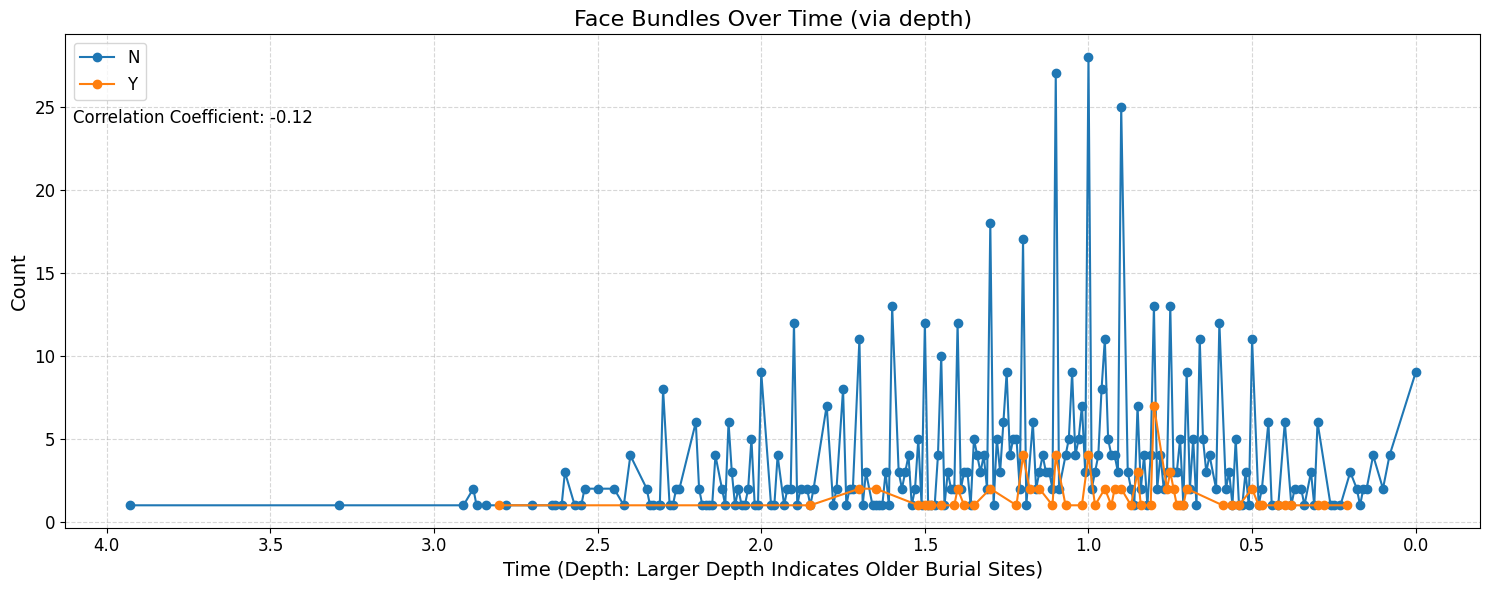

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load depth/facebundles into DataFrame
file_path = '/content/drive/MyDrive/INTEX2023/CSVs/depthANDfacebundles.csv' 
depthfacebundles = pd.read_csv(file_path)

# Replace empty or null values in facebundles with "N"
depthfacebundles['facebundles'] = depthfacebundles['facebundles'].fillna('N')

# Replace values with "#" with "Y"
depthfacebundles['facebundles'] = depthfacebundles['facebundles'].replace('#', 'Y')

# Recode "TR E" to "Y"
depthfacebundles['facebundles'] = depthfacebundles['facebundles'].replace('TR E', 'Y')

# Filter out rows with NULL values in depth
depthfacebundles = depthfacebundles.dropna(subset=['depth'])

# Convert depth column to numeric
depthfacebundles['depth'] = pd.to_numeric(depthfacebundles['depth'], errors='coerce')

# Sort by depth in descending order
depthfacebundles = depthfacebundles.sort_values(by='depth', ascending=False)

# Group by facebundles and depth, and calculate count of occurrences
depthfacebundles = depthfacebundles.groupby(['facebundles', 'depth']).size().reset_index(name='count')

# Extract facebundles, depth, and count columns
facebundles = depthfacebundles['facebundles']
depth = depthfacebundles['depth']
count = depthfacebundles['count']

# Create a line graph of count vs. depth for each facebundles category
plt.figure(figsize=(15, 6))  # Increase figure width to 12 inches
for fb in facebundles.unique():
    plt.plot(depth[facebundles == fb], count[facebundles == fb], marker='o', label=fb)

plt.xlabel('Time (Depth: Larger Depth Indicates Older Burial Sites)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Face Bundles Over Time (via depth)', fontsize=16)
plt.legend(loc='upper left', fontsize=12)

# Calculate and print correlation coefficient
corr_coeff = np.corrcoef(depth, count)[0, 1]
corr_text = 'Correlation Coefficient: {:.2f}'.format(corr_coeff)
plt.text(0.09, .82, corr_text, transform=plt.gca().transAxes, ha='center', fontsize=12) # Add correlation coefficient text

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().invert_xaxis()  # Reflect x-axis
plt.tight_layout()
plt.show()

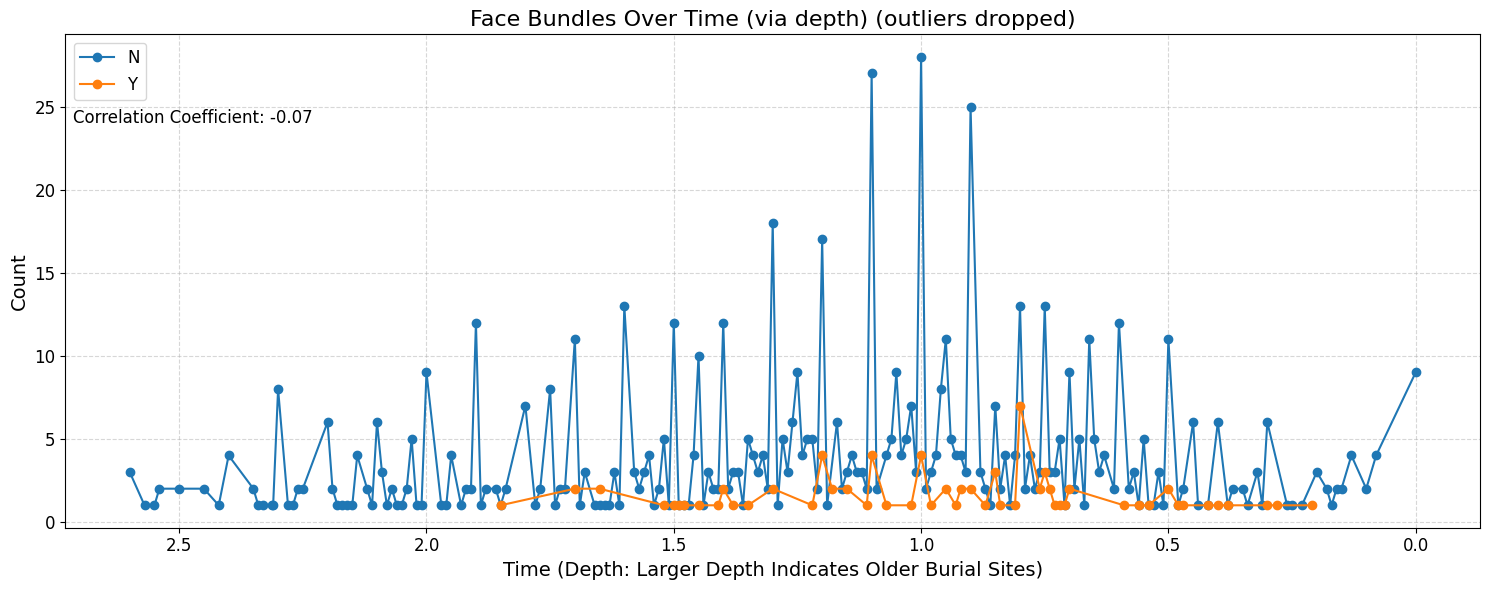

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load depth/facebundles into DataFrame
file_path = '/content/drive/MyDrive/INTEX2023/CSVs/depthANDfacebundles.csv' 
depthfacebundles = pd.read_csv(file_path)

# Replace empty or null values in facebundles with "N"
depthfacebundles['facebundles'] = depthfacebundles['facebundles'].fillna('N')

# Replace values with "#" with "Y"
depthfacebundles['facebundles'] = depthfacebundles['facebundles'].replace('#', 'Y')

# Recode "TR E" to "Y"
depthfacebundles['facebundles'] = depthfacebundles['facebundles'].replace('TR E', 'Y')

# Filter out rows with NULL values in depth
depthfacebundles = depthfacebundles.dropna(subset=['depth'])

# Convert depth column to numeric
depthfacebundles['depth'] = pd.to_numeric(depthfacebundles['depth'], errors='coerce')

# Drop outliers from depth column
Q1 = depthfacebundles['depth'].quantile(0.25)
Q3 = depthfacebundles['depth'].quantile(0.75)
IQR = Q3 - Q1
depthfacebundles = depthfacebundles[~((depthfacebundles['depth'] < (Q1 - 1.5 * IQR)) | (depthfacebundles['depth'] > (Q3 + 1.5 * IQR)))]

# Sort by depth in descending order
depthfacebundles = depthfacebundles.sort_values(by='depth', ascending=False)

# Group by facebundles and depth, and calculate count of occurrences
depthfacebundles = depthfacebundles.groupby(['facebundles', 'depth']).size().reset_index(name='count')

# Extract facebundles, depth, and count columns
facebundles = depthfacebundles['facebundles']
depth = depthfacebundles['depth']
count = depthfacebundles['count']

# Create a line graph of count vs. depth for each facebundles category
plt.figure(figsize=(15, 6))  # Increase figure width to 12 inches
for fb in facebundles.unique():
    plt.plot(depth[facebundles == fb], count[facebundles == fb], marker='o', label=fb)

plt.xlabel('Time (Depth: Larger Depth Indicates Older Burial Sites)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Face Bundles Over Time (via depth) (outliers dropped)', fontsize=16)
plt.legend(loc='upper left', fontsize=12)

# Calculate and print correlation coefficient
corr_coeff = np.corrcoef(depth, count)[0, 1]
corr_text = 'Correlation Coefficient: {:.2f}'.format(corr_coeff)
plt.text(0.09, .82, corr_text, transform=plt.gca().transAxes, ha='center', fontsize=12) # Add correlation coefficient text

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().invert_xaxis()  # Reflect x-axis
plt.tight_layout()
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

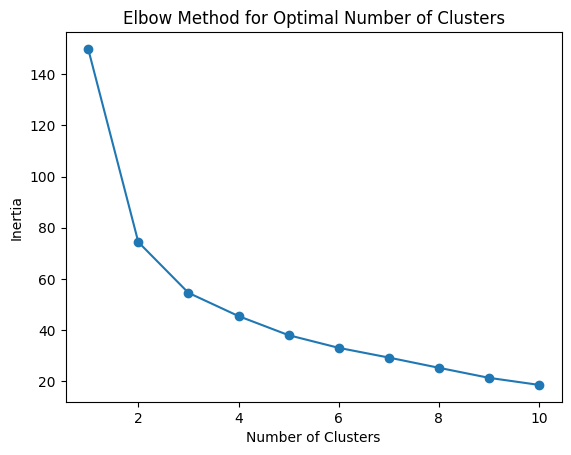

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


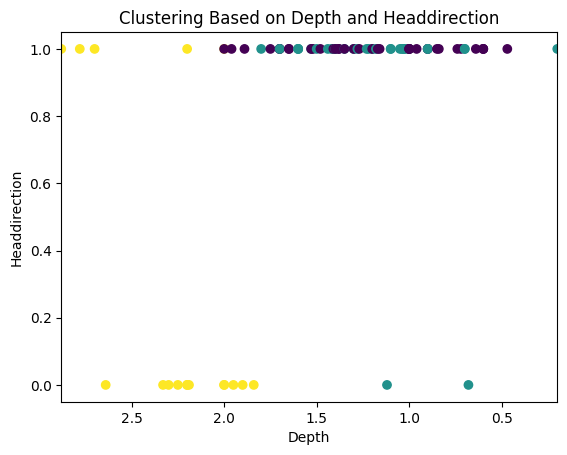

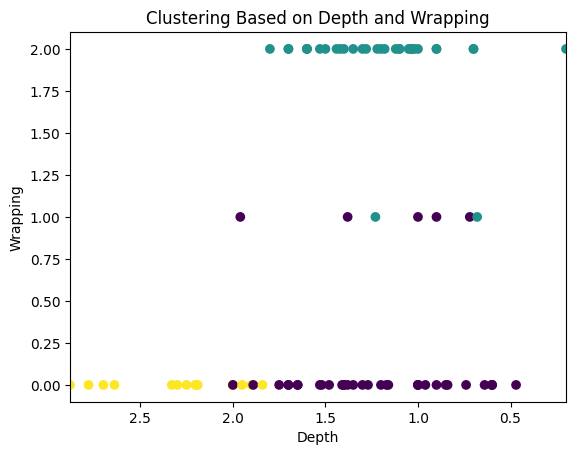

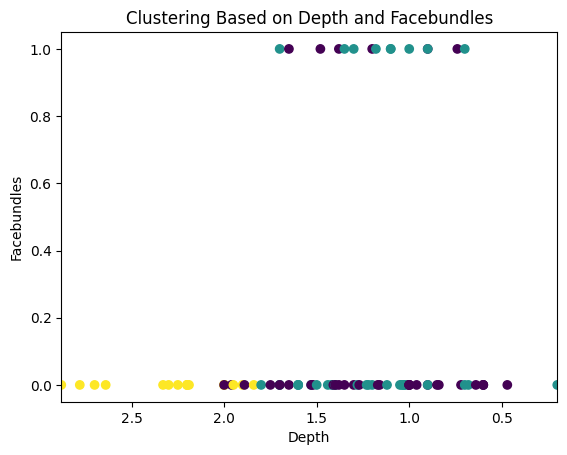

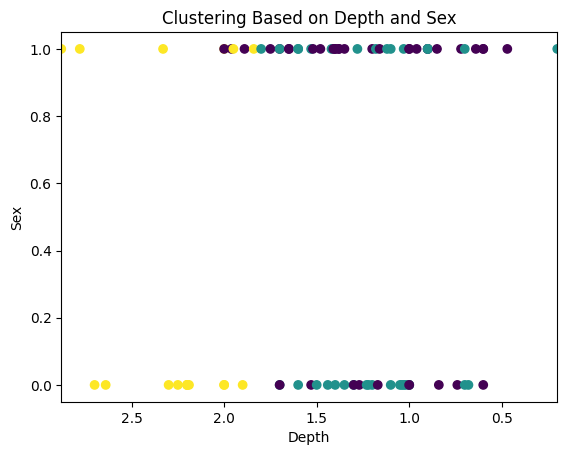

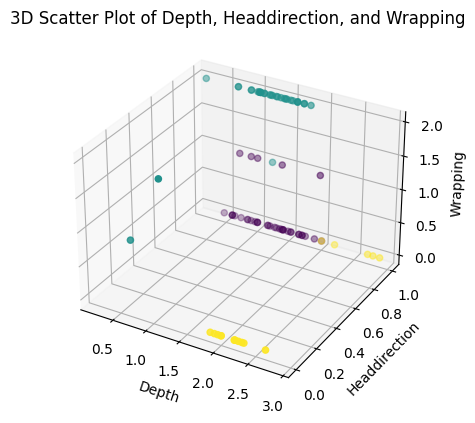

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

# Load the sample data into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/INTEX2023/CSVs/clustering.csv')

# Drop rows with null or blank entries
data.dropna(inplace=True)

# Calculate z-score for depth column
data['depth_zscore'] = zscore(data['depth'])

# Drop rows where depth is an outlier (z-score > 3 or z-score < -3)
data = data[(data['depth_zscore'] <= 3) & (data['depth_zscore'] >= -3)]

# Encode categorical variables
label_encoder = LabelEncoder()
data['headdirection'] = label_encoder.fit_transform(data['headdirection'])
data['wrapping'] = label_encoder.fit_transform(data['wrapping'])
data['facebundles'] = label_encoder.fit_transform(data['facebundles'])
data['sex'] = label_encoder.fit_transform(data['sex'])

# Select features for clustering
X = data[['depth', 'headdirection', 'wrapping', 'facebundles', 'sex']]

# Perform k-means clustering with varying number of clusters
num_clusters = range(1, 11)  # try different number of clusters from 1 to 10
inertias = []  # to store the inertia (sum of squared distances) for each number of clusters

for n in num_clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the inertia vs. number of clusters to determine optimal number of clusters
plt.figure()
plt.plot(num_clusters, inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Based on the elbow plot, determine the optimal number of clusters
optimal_num_clusters = 3  # set the optimal number of clusters based on the plot

# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters)
kmeans.fit(X)
data['cluster'] = kmeans.labels_

# Visualize the results separately for each feature
for feature in ['headdirection', 'wrapping', 'facebundles', 'sex']:
    plt.figure()
    plt.scatter(data['depth'], data[feature], c=data['cluster'], cmap='viridis')
    plt.xlim(max(data['depth']), min(data['depth']))  # Flip x-axis
    plt.xlabel('Depth')
    plt.ylabel(feature.capitalize())
    plt.title(f'Clustering Based on Depth and {feature.capitalize()}')
    plt.show()

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['depth'], data['headdirection'], data['wrapping'], c=data['cluster'], cmap='viridis')
ax.set_xlabel('Depth')
ax.set_ylabel('Headdirection')
ax.set_zlabel('Wrapping')
ax.set_title('3D Scatter Plot of Depth, Headdirection, and Wrapping')
plt.show()